# Modelling

## Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer 
from nltk.corpus import stopwords
import re
import string 
from sklearn.metrics import accuracy_score 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction import text 
from sklearn.ensemble import RandomForestClassifier
import pycaret
from pycaret.nlp import *
from pycaret.classification import *

In [2]:
df_final = pd.read_csv('../data/df_final.csv', encoding='utf-8')

In [3]:
pd.set_option('display.max_colwidth',3000)

## Examine dataframe

In [36]:
print(df_final.shape)
df_final.head()

(19615, 2)


,subreddit_target,lem_tokenized_content
0,1,"['joe', 'rogan', 'experience', 'ryan', 'holiday']"
1,1,"['quote', 'from', 'the', 'man', 'himself']"
2,1,"['stoic', 'approach', 'to', 'dealing', 'with', 'guilt', 'i', 'got', 'an', 'internship', 'but', 'didnt', 'tell', 'my', 'friend', 'to', 'increase', 'my', 'chance', 'of', 'getting', 'it', 'recently', 'my', 'friend', 'and', 'i', 'were', 'eagerly', 'awaiting', 'information', 'regarding', 'an', 'internship', 'opportunity', 'from', 'our', 'lecturer', 'in', 'college', 'upon', 'receiving', 'the', 'detail', 'of', 'the', 'internship', 'we', 'both', 'seemed', 'a', 'little', 'hesitant', 'about', 'applying', 'and', 'ultimately', 'decided', 'not', 'to', 'if', 'you', 'dont', 'get', 'an', 'internship', 'for', 'the', 'next', 'semester', 'you', 'can', 'do', 'a', 'certificate', 'a', 'a', 'backup', 'plan', 'anyway', 'so', 'we', 'both', 'werent', 'too', 'concernedhowever', 'on', 'the', 'final', 'day', 'to', 'apply', 'for', 'the', 'internship', 'i', 'started', 'to', 'secondguess', 'myself', 'a', 'i', 'felt', 'like', 'i', 'would', 'be', 'missing', 'out', 'on', 'a', 'huge', 'opportunity', 'to', 'learn', 'if', 'i', 'didnt', 'at', 'least', 'try', 'to', 'get', 'it', 'i', 'also', 'did', 'a', 'little', 'more', 'research', 'into', 'the', 'job', 'and', 'it', 'started', 'to', 'look', 'more', 'and', 'more', 'interesting', 'the', 'longer', 'i', 'looked', 'into', 'it', 'which', 'i', 'didnt', 'mention', 'to', 'my', 'friend', 'ultimately', 'i', 'decided', 'to', 'send', 'in', 'my', 'cv', 'and', 'cover', 'letter', 'without', 'notifying', 'my', 'friend', 'and', 'i', 'got', 'an', 'email', 'back', 'to', 'schedule', 'an', 'interview', 'with', 'the', 'company', 'which', 'i', 'did', 'a', 'few', 'day', 'later', 'meanwhile', 'my', 'friend', 'doesnt', 'know', 'that', 'i', 'applied', 'for', 'the', 'internship', 'and', 'think', 'im', 'doing', 'the', 'certificate', 'with', 'him', 'because', 'we', 'both', 'decided', 'on', 'our', 'own', 'that', 'we', 'just', 'werent', 'interested', 'in', 'the', 'job', 'specificationsfastforward', 'a', 'few', 'more', 'day', 'and', 'i', 'end', 'up', 'getting', 'the', 'internship', 'i', 'feel', 'delighted', 'to', 'get', 'it', 'because', 'i', 'worked', 'very', 'hard', 'throughout', 'my', 'course', 'and', 'i', 'will', 'put', 'everything', 'i', 'can', 'into', 'this', 'internship', 'to', 'make', 'it', 'worth', 'my', 'while', 'and', 'the', 'company', 'timeresources', 'however', 'over', 'the', 'past', 'few', 'day', 'ive', 'been', 'feeling', 'quite', 'shameful', 'and', 'guilty', 'because', 'deep', 'down', 'i', 'know', 'i', 'didnt', 'mention', 'my', 'application', 'for', 'the', 'job', 'to', 'my', 'friend', 'because', 'i', 'knew', 'that', 'if', 'he', 'applied', 'thered', 'be', 'a', 'lower', 'chance', 'of', 'me', 'getting', 'it', 'the', 'more', 'candidate', 'the', 'le', 'chance', 'of', 'winning', 'if', 'that', 'make', 'sensei', 'ended', 'up', 'telling', 'him', 'the', 'truth', 'a', 'few', 'day', 'ago', 'about', 'the', 'whole', 'matter', 'and', 'deeply', 'apologized', 'to', 'him', 'for', 'withholding', 'information', 'about', 'the', 'job', 'and', 'my', 'application', 'for', 'i..."
3,1,"['the', 'conscious', 'cosmos']"
4,1,"['question', 're', 'enchiridion', 'question', 'at', 'bottom', 'of', 'postive', 'been', 'working', 'my', 'way', 'through', 'section', 'of', 'a', 'of', 'the', 'enchiridionthe', 'manual', 'a', 'an', 'exercise', 'to', 'refresh', 'my', 'learning', 'today', 'i', 'find', 'myself', 'looking', 'at', 'section', 'if', 'you', 'want', 'to', 'get', 'better', 'let', 'yourself', 'seem', 'foolish', 'and', 'uncaring', 'aboutgt', 'external', 'dont', 'try', 'to', 'seem', 'knowledgeable', 'if', 'anyone', 'think', 'youregt', 'important', 'youre', 'doing', 'it', 'wronggt', 'it', 'difficult', 'to', 'keep', 'your', 'will', 'on', 'track', 'and', 'simultaneously', 'go', 'aftergt', 'external', 'thing', 'take', 'care', 'of', 'one', 'and', 'youll', 'surely', 'neglect', 'the', 'otherim', 'having', 'trouble', 'reconciling', 'th

In [5]:
# select only `subreddit` and `lem_tokenized_content` column
df_final.drop(['content', 'tokenized_content'], axis=1, inplace=True)

In [38]:
# 'subreddit' is our target variable, however there might be the word 'subreddit' appearing in the content column 
# so we rename the target variable to a unique name. 

df_final.rename(columns = {'subreddit':'subreddit_target'}, inplace=True)

## Vectorizing

At this stage, we have combined the `title` and `selftext` column, tokenized and lemmatized into `lem_tokenized_content` column for both r/Stoicism and r/Buddhism. Next, we will use `CountVectorizer` which transforms the text into a vector based on the count of each word. However, looking at the original lists of words, we can see undescriptive words such as 'it', 'to', 'so', 'they', 'for'. `CountVectorizer` has a parameter 'stop_words' which we will use to drop such words.  

Additional non-descriptive words are also observed not part of the original list, so we will add these into the stop_word list

In [8]:
# add stop words
# https://stackoverflow.com/questions/24386489/adding-words-to-scikit-learns-countvectorizers-stop-list

add_stop_words = ['wa', 'im', 'dont', 'ha', 'ive', 'doe']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [9]:
print(stop_words)

frozenset({'and', 'yourself', 'nor', 'except', 'eg', 'full', 'nine', 'whereas', 'with', 'elsewhere', 'nevertheless', 'my', 'that', 'five', 'herein', 'who', 'may', 'should', 'six', 'over', 'sixty', 'never', 'i', 'whose', 'therefore', 'due', 'dont', 'go', 'would', 'thereafter', 'part', 'further', 'besides', 'put', 'above', 'too', 'onto', 'seem', 'well', 'front', 'could', 'always', 'doe', 'neither', 'into', 'during', 'an', 'however', 'are', 'how', 'your', 'otherwise', 'call', 'see', 'them', 'whereby', 'herself', 'whither', 'somewhere', 'another', 'cant', 'hers', 'latter', 'give', 'hereupon', 'has', 'im', 'eight', 'first', 'latterly', 'bill', 'along', 'had', 'by', 'beyond', 'might', 'beside', 'myself', 'was', 'after', 'so', 'amongst', 'through', 'anyone', 'you', 'less', 'throughout', 'his', 'at', 'before', 'both', 'became', 'he', 'everywhere', 'him', 'it', 'if', 'moreover', 'thus', 'whatever', 'seeming', 'thence', 'top', 'meanwhile', 'whereupon', 'each', 'find', 'thereby', 'serious', 'bott

In [16]:
# instantiate CountVectorizer
cvec = CountVectorizer(stop_words=stop_words, max_features=5000)

In [40]:
cvec_df = pd.DataFrame(cvec.fit_transform(df_final['lem_tokenized_content']).todense(), 
                          columns=cvec.get_feature_names())

In [18]:
cvec_df.shape

(19615, 5000)

In [20]:
num_features = list(cvec_df.columns)

In [21]:
num_features 

['aa',
 'abandon',
 'abandoned',
 'abandoning',
 'abide',
 'ability',
 'able',
 'abode',
 'abortion',
 'abrahamic',
 'abroad',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorption',
 'abstain',
 'abstract',
 'absurd',
 'abundance',
 'abuse',
 'abused',
 'abuser',
 'abusing',
 'abusive',
 'academic',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessible',
 'accident',
 'accidentally',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accord',
 'accordance',
 'according',
 'accordingly',
 'account',
 'accountability',
 'accumulate',
 'accumulated',
 'accurate',
 'accused',
 'achieve',
 'achieved',
 'achievement',
 'achieving',
 'acknowledge',
 'acknowledging',
 'acquaintance',
 'acquire',
 'acquired',
 'act',
 'acted',
 'acting',
 'action',
 'active',
 'actively',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'adapt',
 'add',
 'added',
 'addict',
 'addicted',
 'addiction',
 'adding',
 'addition',
 'additi

After vectorizing, a new column is created for every word in the list, and the values represents the number of times the word appears. A max_features of 5000 is chosen to limit the maximum words to be prcoessed. Further exploration could be done to change the value to see if the model improves.

Secondly, Tfidfvectorizer is an alternative algorithm to transform text. Instead of counting the number of times each word appears like CountVectorizer, Tfidfvectorizer considers the overall texts and gives a weight to each words depending on the frequency it appears. Further exploration could be done to see if Tfidfvectorizer provides a better score.

In [22]:
df_final_cvec = pd.concat([cvec_df, df_final['subreddit_target']], axis=1)

In [42]:
print(df_final_cvec.shape)
df_final_cvec.head()

(19615, 5001)


,aa,abandon,abandoned,abandoning,abide,ability,able,abode,abortion,abrahamic,...,youve,yus,zazen,zen,zeno,zero,zeus,zone,zoom,subreddit_target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
df_final_cvec['subreddit_target'].value_counts(normalize=True)

1    0.500484
0    0.499516
Name: subreddit_target, dtype: float64

The dataset is balanced and it is now ready for modelling

## Comparing Models using Pycaret

Pycaret is a library that automates machine learning workflow. Pycaret runs various models under the hood and summaries the results. Our task is a classification problem and we will use Pycaret's classification module.

In [24]:
clfl = setup(data=df_final_cvec, target='subreddit_target', numeric_features=num_features)

,Description,Value
0,session_id,7487
1,Target,subreddit_target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(19615, 5001)"
5,Missing Values,False
6,Numeric Features,5000
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9246,0.9809,0.8973,0.9492,0.9225,0.8492,0.8506,1.5360
lr,Logistic Regression,0.9211,0.9755,0.8922,0.9471,0.9187,0.8422,0.8438,5.7390
svm,SVM - Linear Kernel,0.9104,0.0000,0.8859,0.9318,0.9081,0.8208,0.8220,1.6160
rf,Random Forest Classifier,0.9071,0.9657,0.9140,0.9016,0.9077,0.8141,0.8143,5.6480
ada,Ada Boost Classifier,0.9005,0.9661,0.8456,0.9500,0.8947,0.8010,0.8060,3.5870
et,Extra Trees Classifier,0.8980,0.9582,0.9305,0.8737,0.9012,0.7959,0.7977,12.0850
gbc,Gradient Boosting Classifier,0.8929,0.9688,0.8195,0.9606,0.8844,0.7859,0.7945,14.5770
dt,Decision Tree Classifier,0.8731,0.8771,0.8676,0.8772,0.8723,0.7461,0.7463,3.6470
ridge,Ridge Classifier,0.7933,0.0000,0.7162,0.8467,0.7759,0.5866,0.5938,1.9070
knn,K Neighbors Classifier,0.7877,0.8733,0.6374,0.9114,0.7499,0.5754,0.6034,54.3020


---

We are using Accuracy as the desired score for our classification problem as we want to correctly identify which philosophical beliefs a person is inclined to.  

Pycaret reports Light Gradient Boosting Machine (lightgbm) as the model with the best accuracy (0.9246), and it also performs the best in terms of F1, Kappa and MCC score. Logistic regression is the next best model with an accuracy of 0.9211, a 0.38% only decreased compared to lightgbm. We will proceed using lightgbm for further tuning.

In [27]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7487, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [28]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9170,0.9775,0.9052,0.9269,0.9159,0.8339,0.8342
1,0.9315,0.9852,0.8994,0.9611,0.9292,0.8631,0.8648
2,0.9235,0.9815,0.8921,0.9518,0.9210,0.8470,0.8487
3,0.9177,0.9781,0.8819,0.9498,0.9146,0.8354,0.8375
4,0.9279,0.9823,0.9023,0.9508,0.9260,0.8558,0.8569
5,0.9301,0.9846,0.9067,0.9511,0.9284,0.8602,0.8611
6,0.9243,0.9786,0.9010,0.9450,0.9225,0.8485,0.8494
7,0.9257,0.9794,0.8952,0.9535,0.9234,0.8514,0.8530
8,0.9308,0.9837,0.9025,0.9568,0.9288,0.8616,0.8630


## Tuning the model

Pycaret also allows hyperparameters tuning, after selecting the model. By default, it uses Random Grid Search and print the score grid by fold for the best model.

In [30]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9126,0.9760,0.8907,0.9314,0.9106,0.8252,0.8260
1,0.9301,0.9824,0.8936,0.9638,0.9274,0.8602,0.8624
2,0.9243,0.9805,0.8892,0.9561,0.9215,0.8485,0.8506
3,0.9162,0.9764,0.8776,0.9510,0.9128,0.8325,0.8350
4,0.9228,0.9801,0.8994,0.9434,0.9209,0.8456,0.8465
5,0.9272,0.9825,0.8980,0.9536,0.9249,0.8543,0.8558
6,0.9155,0.9783,0.8908,0.9372,0.9134,0.8310,0.8321
7,0.9192,0.9778,0.8850,0.9500,0.9164,0.8383,0.8403
8,0.9279,0.9816,0.8996,0.9537,0.9258,0.8558,0.8572


## Feature Importance Plot

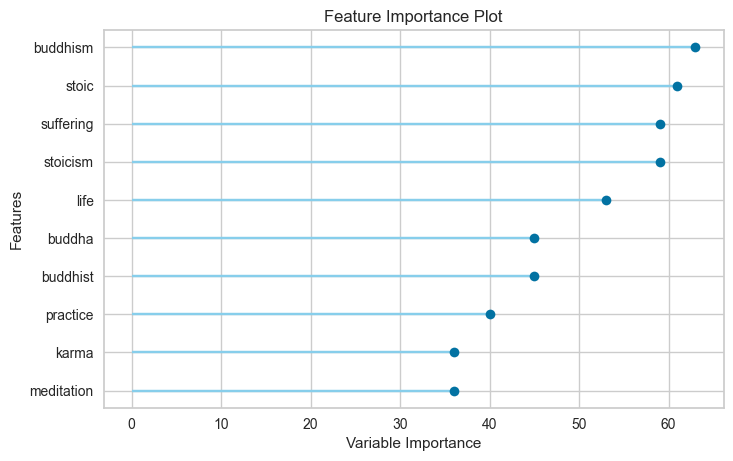

In [31]:
plot_model(tuned_lightgbm, plot='feature')

The plot shows the features that the model determined to be useful in trying the predict the target.

It is not surprising that `buddhism`, `stoic`, `buddhist` appears in the list. Perhaps further feature engineering could be done to remove the these words to see how the model performs. 

Other keywords like `suffering`, `life`, `meditation`, `karma` are part of Buddhism teaching, though it can be argued that some of it applies for Stoicism beliefs as well. By understanding these keyword, we are able to determine the keywords a User might input into the wellness app to classify his/her two philosophical beliefs.

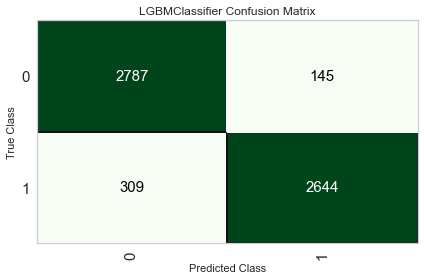

In [32]:
plot_model(tuned_lightgbm, plot='confusion_matrix')

## Predict on test data

In [44]:
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9229,0.9808,0.8954,0.9480,0.9209,0.8457,0.8471


The accuracy on the test data achieved `0.9229` compared to `0.9214` on training test. It is not a sigificiant difference which means there is no overfitting 

## Finalizing Model

In [47]:
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9229,0.9808,0.8954,0.9480,0.9209,0.8457,0.8471


In [45]:
final_model = finalize_model(tuned_lightgbm)

The tuned lightgbm model is selected as our final model.

## Conclusion

We have extracted approximately 10,000 posts from r/Stoicism and /rBuddhism to analyse and determine the keywords from each subreddit. The text were cleaned and preprocessed using NLP methods before selecting the modelling using Pycaret. The preprocessed data provided some insights in certain keywords in each subreddit - such as `Ryan` and `Abdomen` in r/Stoicism and r/Buddhism respectively. In fact, we discover Ryan Holiday is an author of a popular book on Stoicism, and we may consider using his book as additional information sources or even quoting his book as the message of the day.

Next, the classification model, lightgbm was selected as the final model, having the best accuracy score compared to other classification models. The model selected achieved an accuracy of 92% in identifying between stocisim and buddhism. We are able to use the model to predict the User's philosophical incline based on the journal entry written in the wellness app we are developing and a relevant thought of the day or message will be returned. 

We believe that the model can be adjusted and updated in our wellness app to expand into other philosophical believes.

In [62]:
## Further exploration/ improvement 
# 1. predicting on new data by extracting new posts 
# 2. possible deployment with heroku 
# 3. further feature engineering to remove unwanted words 
# 4. EDA such as topic extraction using gensim or sentimential analysis
# 5. Using tfidvectorizer and/or n-grams for tuning.
# 6. Look into SHAP to understand the model